In [22]:
import numpy as np
import matplotlib.pyplot as plt  
import os 
import scipy.io as sio

In [2]:
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

In [3]:
groundTruth_data = scipy.io.loadmat('groundTruth_Cuprite_nEnd12.mat')
Cuprite_data = scipy.io.loadmat('Cuprite.mat')
Cuprite=Cuprite_data['X'] 
reference_spectra = np.transpose(groundTruth_data['M'])
print(Cuprite.shape)  
print(reference_spectra.shape)


(512, 614, 224)
(12, 224)


In [4]:
# print the maximum and minimum values
maxVal=np.amax(Cuprite)
minVal=np.amin(Cuprite)
print("Minimum value:", minVal)
print("Maximum value:", maxVal)
Cuprite_shifted = Cuprite + abs(minVal) 
Cuprite_norm = Cuprite_shifted / (abs(minVal) + abs(maxVal))
Cuprite_norm = Cuprite_norm + 1e-6  
maxVal=np.amax(Cuprite_norm)
minVal=np.amin(Cuprite_norm) 
print("Minimum value in normalized array:", np.min(Cuprite_norm))
print("Maximum value in normalized array:", np.max(Cuprite_norm))

Minimum value: -50
Maximum value: 12000
Minimum value in normalized array: 1e-06
Maximum value in normalized array: 1.000001


In [5]:
RmaxVal=np.amax(reference_spectra)
RminVal=np.amin(reference_spectra)
print("Minimum value:", RminVal)
print("Maximum value:", RmaxVal) 
reference_spectra_norm = reference_spectra / (abs(RminVal) + abs(RmaxVal))
reference_spectra_norm = reference_spectra_norm + 1e-6  
maxVal=np.amax(reference_spectra_norm)
minVal=np.amin(reference_spectra_norm) 
print("Minimum value in normalized array:", np.min(reference_spectra_norm))
print("Maximum value in normalized array:", np.max(reference_spectra_norm))

Minimum value: 0.0770244938180001
Maximum value: 0.9120257608554999
Minimum value in normalized array: 0.07787822964939432
Maximum value in normalized array: 0.9221237703506057


In [6]:
cuprite_2d=Cuprite_norm.reshape(-1,Cuprite.shape[-1])
print("datset shape",cuprite_2d.shape)
Label = np.full((314368,), -1)
print("labels shape",Label.shape)

datset shape (314368, 224)
labels shape (314368,)


In [7]:
data={
  "Alunite": {
    "Threshold": 0.930899999,
    "No. of data points": 707
  },
  "Andradite": {
    "Threshold": 0.9466,
    "No. of data points": 1039
  },
  "Buddingtonite": {
    "Threshold": 0.94101,
    "No. of data points": 920
  },
  "Dumortierite": {
    "Threshold": 0.93900,
    "No. of data points": 989
  },
  "Kaolinite1": {
    "Threshold": 0.9488,
    "No. of data points": 327
  },
  "Kaolinite2": {
    "Threshold": 0.9550989,
    "No. of data points": 1482
  },
  "Muscovite": {
    "Threshold": 0.9430000,
    "No. of data points": 1259
  },
  "Montmorillonite": {
    "Threshold": 0.9523,
    "No. of data points": 1677
  },
  "Nontronite": {
    "Threshold": 0.9615,
    "No. of data points": 1066
  },
  "Pyrope": {
    "Threshold": 0.949222,
    "No. of data points": 474
  },
  "Sphene": {
    "Threshold": 0.9440,
    "No. of data points": 343
  },
  "Chalcedony": {
    "Threshold": 0.94658999,
    "No. of data points": 1079
  }
}


thresholds = np.zeros(12)  # initialize a NumPy array of size 12 with zeros

# fill the array with the threshold values of each element in serial order
for i, mineral in enumerate(data):
    thresholds[i] = data[mineral]['Threshold']
print("thresholds shape : ",thresholds.shape)


thresholds shape :  (12,)


In [8]:
total_data_points = 0
for mineral_data in data.values():
    total_data_points += mineral_data['No. of data points']
print("Total number of data points:", total_data_points)


Total number of data points: 11362


In [9]:
for i in range(cuprite_2d.shape[0]):
    for j in range(reference_spectra.shape[0]):
        if cosine_similarity(cuprite_2d[i],reference_spectra[j])>=thresholds[j]:
            Label[i]=j
    

In [10]:
labels=np.sum(Label>=0)
print(labels)  

3504


In [11]:
import numpy as np

size = 314368

Alunite_array = np.zeros(size)
Andradite_array = np.zeros(size)
Buddingtonite_array = np.zeros(size)
Dumortierite_array = np.zeros(size)
Kaolinite1_array = np.zeros(size)
Kaolinite2_array = np.zeros(size)
Muscovite_array = np.zeros(size)
Montmorillonite_array = np.zeros(size)
Nontronite_array = np.zeros(size)
Pyrope_array = np.zeros(size)
Sphene_array = np.zeros(size)
Chalcedony_array = np.zeros(size)

totalpoint=0

In [12]:
print(len(cuprite_2d))

314368


In [13]:
i=0
for j,elem in enumerate(cuprite_2d):
    if(cosine_similarity(elem,reference_spectra[i])>=thresholds[i] ):
        Alunite_array[j]=1
totalpoint+=np.sum(Alunite_array)
i=i+1

for j,elem in enumerate(cuprite_2d):
    if(cosine_similarity(elem,reference_spectra[i])>=thresholds[i] ):   
        Andradite_array[j]=1
totalpoint+=np.sum(Andradite_array) 
i=i+1 

for j,elem in enumerate(cuprite_2d):
    if(cosine_similarity(elem,reference_spectra[i])>=thresholds[i] ):  
        Buddingtonite_array[j]=1
totalpoint+=np.sum(Buddingtonite_array)  
i=i+1

for j,elem in enumerate(cuprite_2d):
    if(cosine_similarity(elem,reference_spectra[i])>=thresholds[i] ):   
        Dumortierite_array[j]=1
totalpoint+=np.sum(Dumortierite_array)
i=i+1

for j,elem in enumerate(cuprite_2d):
    if(cosine_similarity(elem,reference_spectra[i])>=thresholds[i] ):  
        Kaolinite1_array[j]=1
totalpoint+=np.sum(Kaolinite1_array)
i=i+1

for j,elem in enumerate(cuprite_2d):
    if(cosine_similarity(elem,reference_spectra[i])>=thresholds[i] ):  
        Kaolinite2_array[j]=1
totalpoint+=np.sum(Kaolinite2_array)   
i=i+1

for j,elem in enumerate(cuprite_2d):
    if(cosine_similarity(elem,reference_spectra[i])>=thresholds[i] ):   
        Muscovite_array[j]=1
totalpoint+=np.sum(Muscovite_array)  
i=i+1

for j,elem in enumerate(cuprite_2d):
    if(cosine_similarity(elem,reference_spectra[i])>=thresholds[i] ):   
        Montmorillonite_array[j]=1
totalpoint+=np.sum(Montmorillonite_array)  
i=i+1

for j,elem in enumerate(cuprite_2d):
    if(cosine_similarity(elem,reference_spectra[i])>=thresholds[i] ):  
        Nontronite_array[j]=1
totalpoint+=np.sum(Nontronite_array)   
i=i+1

for j,elem in enumerate(cuprite_2d):
    if(cosine_similarity(elem,reference_spectra[i])>=thresholds[i] ):  
        Pyrope_array[j]=1
totalpoint+=np.sum(Pyrope_array)
i=i+1

for j,elem in enumerate(cuprite_2d):
    if(cosine_similarity(elem,reference_spectra[i])>=thresholds[i] ):   
        Sphene_array[j]=1
totalpoint+=np.sum(Sphene_array)
i=i+1

for j,elem in enumerate(cuprite_2d):
    if(cosine_similarity(elem,reference_spectra[i])>=thresholds[i] ):   
        Chalcedony_array[j]=1
totalpoint+=np.sum(Chalcedony_array)
i=i+1

print(totalpoint)
print(i)

11362.0
12


In [14]:
 
arrays_list = Alunite_array + Andradite_array + Buddingtonite_array + Dumortierite_array + Kaolinite1_array +Kaolinite2_array + Muscovite_array + Montmorillonite_array + Nontronite_array + Pyrope_array + Sphene_array + Chalcedony_array 
mixed_pixels = np.sum(arrays_list >1)
print(mixed_pixels) 

2453


In [15]:
for i,elem in enumerate(arrays_list):
    if(elem>1):
        Label[i]=-1

In [16]:
labels=np.sum(Label>=0)
print(labels)  

1051


In [17]:
values = range(0, 12)

# count the number of elements equal to each value
counts = [np.count_nonzero(Label == v) for v in values]

# print the counts
xem=0
for v, c in zip(values, counts):
    print("No.of datapoints belonging to class - {}: {}".format(v, c))
    xem=xem+c
print("total no of labeled datapoints :",xem)

No.of datapoints belonging to class - 0: 59
No.of datapoints belonging to class - 1: 94
No.of datapoints belonging to class - 2: 31
No.of datapoints belonging to class - 3: 52
No.of datapoints belonging to class - 4: 116
No.of datapoints belonging to class - 5: 51
No.of datapoints belonging to class - 6: 51
No.of datapoints belonging to class - 7: 90
No.of datapoints belonging to class - 8: 187
No.of datapoints belonging to class - 9: 157
No.of datapoints belonging to class - 10: 135
No.of datapoints belonging to class - 11: 28
total no of labeled datapoints : 1051


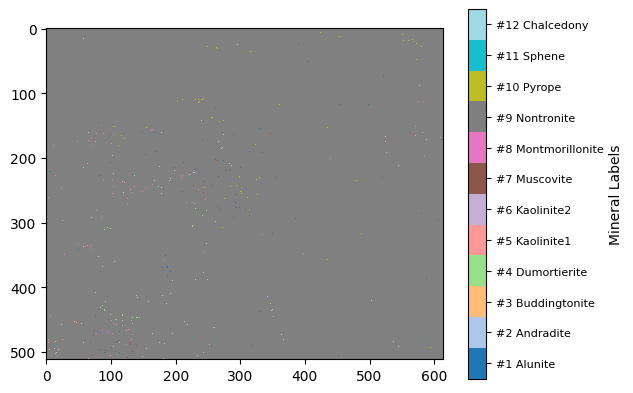

In [18]:
# Reshape HSI to 3D array
cuprite_3d = np.reshape(cuprite_2d, (512, 614, 224))

# Reshape label array to 2D array
label_2d = np.reshape(Label, (512, 614))

# Define color map for elements
cmap = plt.cm.get_cmap('tab20', 12)

# Define color for unlabeled pixels
cmap.set_under('gray')

# Plot the image with labels
fig, ax = plt.subplots()
im = ax.imshow(label_2d, cmap=cmap, vmin=0.5, vmax=12.5, interpolation='nearest')
cbar = fig.colorbar(im, ax=ax, ticks=range(1, 13))
cbar.ax.set_yticklabels(["#1 Alunite", "#2 Andradite", "#3 Buddingtonite", "#4 Dumortierite", "#5 Kaolinite1", 
                         "#6 Kaolinite2", "#7 Muscovite", "#8 Montmorillonite", "#9 Nontronite", "#10 Pyrope",
                         "#11 Sphene", "#12 Chalcedony"])
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_ylabel('Mineral Labels', fontsize=10)
plt.show()


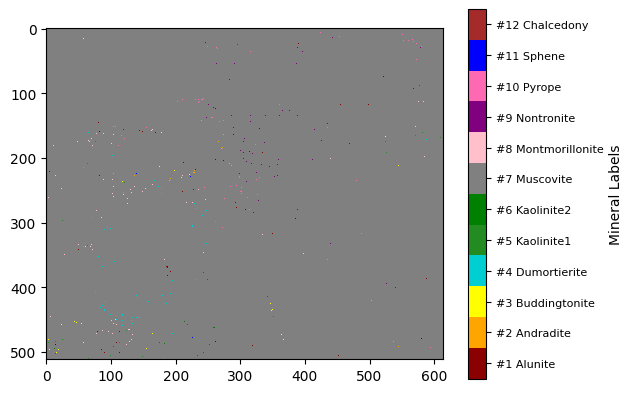

In [19]:
# Reshape HSI to 3D array
from matplotlib.colors import ListedColormap


cuprite_3d = np.reshape(cuprite_2d, (512, 614, 224))

# Reshape label array to 2D array
label_2d = np.reshape(Label, (512, 614))

# Define color map for elements
colors = ['#8B0000', '#FFA500', '#FFFF00', '#00CED1', '#228B22', '#008000', '#808080', 
          '#FFC0CB', '#800080', '#FF69B4', '#0000FF', '#a52a2a']
cmap = ListedColormap(colors)

# Define color for unlabeled pixels
cmap.set_under('gray')

# Plot the image with labels
fig, ax = plt.subplots()
im = ax.imshow(label_2d, cmap=cmap, vmin=0.5, vmax=12.5, interpolation='nearest')
cbar = fig.colorbar(im, ax=ax, ticks=range(1, 13))
cbar.ax.set_yticklabels(["#1 Alunite", "#2 Andradite", "#3 Buddingtonite", "#4 Dumortierite", "#5 Kaolinite1", 
                         "#6 Kaolinite2", "#7 Muscovite", "#8 Montmorillonite", "#9 Nontronite", "#10 Pyrope",
                         "#11 Sphene", "#12 Chalcedony"])
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_ylabel('Mineral Labels', fontsize=10)
plt.show()


In [20]:
valid_indices = np.where((Label >= 0) & (Label <= 11))
 
data_points = cuprite_2d[valid_indices]
labels = Label[valid_indices]

# Print the shapes of the resulting arrays
print(data_points.shape)  # (number of data points, 224)
print(labels.shape) 

(1051, 224)
(1051,)


In [21]:
directory = "Labeled_Data"
if not os.path.exists(directory):
    os.makedirs(directory)

# save data array as a MATLAB file in the new directory
sio.savemat(os.path.join(directory, "data.mat"), {"data": data})

# save labels array as a MATLAB file in the new directory
sio.savemat(os.path.join(directory, "labels.mat"), {"labels": labels})